  **Assignment 4**
  
  Name: Tao He
  
  Discussion Partner: Yifan Zhang

**Part 1: Twitter Sentiment Classification with sklearn**

The file: sentiment-train.csv contains 60k tweets annotated by their sentiments (0: negative, 1: positive), which is a sample
of a very large sentiment corpus that has been weakly annotated based on the emojis contained in the tweets. File sentiment-test.csv contains the testing data organized in the same format as the training data file.

**Task 1 & 2:**
Using [sklearn](https://scikit-learn.org/stable/index.html) (you could search for the relevant functions to see how to use them in your code), 

1. Train a Multinomial Naive Bayes classifier (with default parameters) to predict sentiment on the
training data, featurizing the data using CountVectorizer (also in sklearn). Use the default parameters of CountVectorizer
and max features = 1000 (to limit the number of bag-of-word features to only the top 1k words based on frequency across
the corpus). You should learn more about CountVectorizer parameters and usage [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Report the accuracy of the trained
classifier on the test set. 

2. Use CountVectorizer with binary counts (set binary flag = True), with other parameters same as before. Using
these features, train MultinomialNB classifier with default parameters and report the accuracy of the trained classifier
on the test set. Does using binary counts as features improve the classification accuracy?

**Hint:** we strongly recommend to use [pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html) for reading .csv files and manipulating them in this assignment. 

**Task 1**

In [87]:
import os
import pandas as pd
import numpy as np
import re
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
# !python -m spacy download en_core_web_sm
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from matplotlib import pyplot
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec

**Loading the dataset**

In [33]:
SENTIMENT_TRAIN = os.path.join("sentiment-train.csv")
SENTIMENT_TEST  = os.path.join("sentiment-test.csv")

# WILL_PLAY_TEXT = os.path.join("will_play_text.csv")
WILL_PLAY = os.path.join("will_play.csv")
VOCAB = os.path.join("vocab.txt")
PLAY_GENRES = os.path.join("play_genres.csv")

In [5]:
train = pd.read_csv(SENTIMENT_TRAIN)
test  = pd.read_csv(SENTIMENT_TEST)

In [6]:
train.head()

,sentiment,text
0,1,I LOVE @Health4UandPets u guys r the best!!
1,1,im meeting up with one of my besties tonight! ...
2,1,"@DaRealSunisaKim Thanks for the Twitter add, S..."
3,1,Being sick can be really cheap when it hurts t...
4,1,@LovesBrooklyn2 he has that effect on everyone


In [7]:
test.head()

,sentiment,text
0,1,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,1,Reading my kindle2... Love it... Lee childs i...
2,1,"Ok, first assesment of the #kindle2 ...it fuck..."
3,1,@kenburbary You'll love your Kindle2. I've had...
4,1,@mikefish Fair enough. But i have the Kindle2...


**Analyzing the Dataset**

After loading the dataset, examine the train dataset and check if we have equal rows of data for both the positive and the negative tweets.

<AxesSubplot: xlabel='sentiment', ylabel='count'>

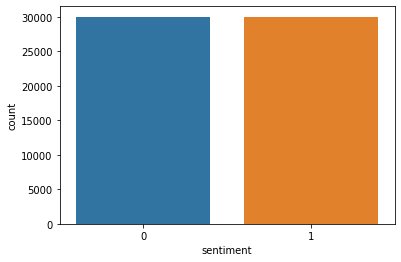

In [8]:
# plotting the data using countplot
sns.countplot(x = "sentiment", data = train)

Now, we will check the words used in both positive and negative tweets.

First, we will get the wordcloud of the positive tweets.

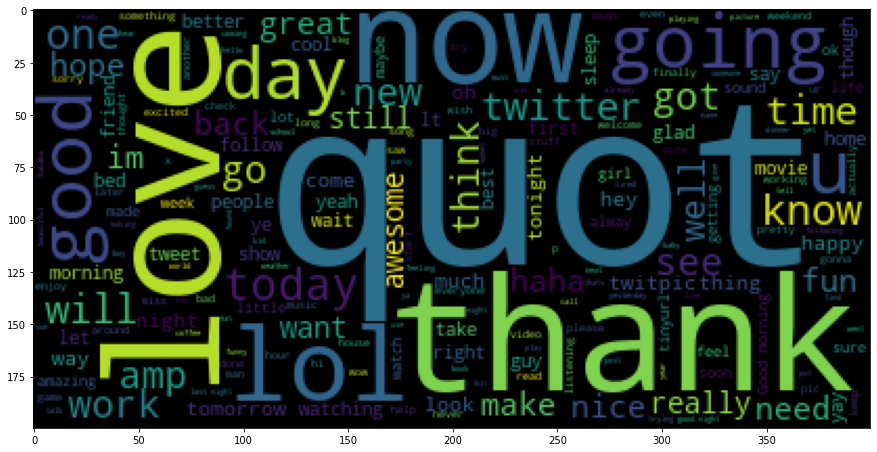

In [9]:
from wordcloud import WordCloud
#creating a string of positive tweets to analyze the words
positive_tweets = train[train['sentiment'] == 1]['text'].tolist()
positive_tweets_string = " ".join(positive_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(positive_tweets_string))

From the cloud, we see that thank, lol, love, and good are the most frequently used words in positive tweets.

We will get the cloud for negative tweets as we did for positive tweets.

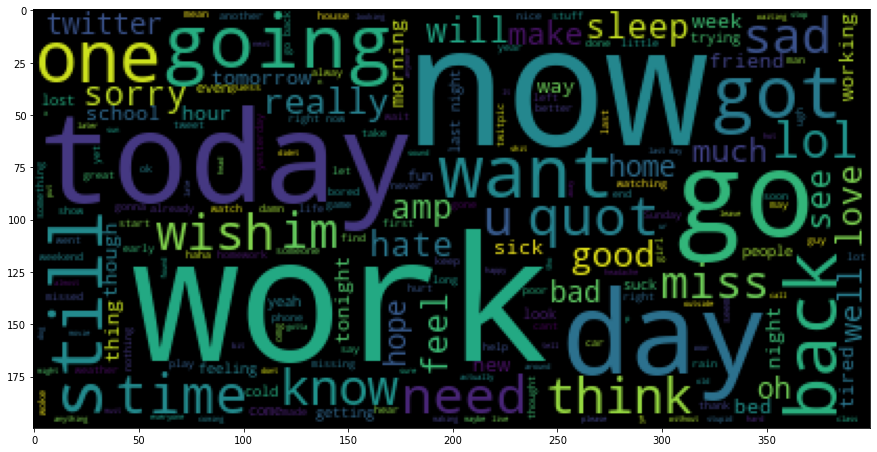

In [10]:
# creating the string of negative tweets to analyze the words
negative_tweets = train[train['sentiment'] == 0]['text'].tolist()
negative_tweets_string = " ".join(negative_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(negative_tweets_string))

From the cloud, we observe that work, now, today, and want are the most frequently used words in negative tweets.

**Data Pre-Processing**

In [11]:
def get_prepare(tweet):
    rows = []
    for row in np.array(tweet):
        rows.append(row)
    X = []
    Y = []
    for row in rows:
        X.append(row[1])
        Y.append(row[0])
    Y = np.array(Y)
    
    X_clean = []
    for str in X:
        # removing the urls, numbers and tags from the text
        X_clean.append(re.sub(r"((www.\S+)|(https?://\S+)|([0-9]\S+)|(@\S+)|(#\S+))", "", str))
        
    return(X_clean, Y)

In [12]:
train_X, train_Y = get_prepare(train)
test_X, test_Y   = get_prepare(test)

**Model Training and Testing**

In [13]:
vectorizer = CountVectorizer(max_features = 1000)
train_X = vectorizer.fit_transform(train_X)
test_X = vectorizer.transform(test_X)

In [14]:
# Multinomial Naive Bayes Classifier
classifier = MultinomialNB()
classifier.fit(train_X, train_Y)

MultinomialNB()

In [15]:
# predicting the labels 
pred = classifier.predict(test_X)

In [16]:
# model accuracy
from sklearn.metrics import classification_report
print(classification_report(test_Y, pred))

print("the Accuracy of the trained classifier is: ", round(100 * metrics.accuracy_score(test_Y, pred), 2), "%.")

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       177
           1       0.73      0.80      0.77       182

    accuracy                           0.75       359
   macro avg       0.75      0.75      0.75       359
weighted avg       0.75      0.75      0.75       359

the Accuracy of the trained classifier is:  75.21 %.


**Task 2**

In [17]:
train_X, train_Y = get_prepare(train)
test_X, test_Y   = get_prepare(test)

vectorizer2 = CountVectorizer(binary = True, max_features = 1000)
train_X = vectorizer2.fit_transform(train_X)
test_X = vectorizer2.transform(test_X)

In [18]:
# Multinomial Naive Bayes Classifier
classifier = MultinomialNB()
classifier.fit(train_X, train_Y)
# predicting the labels 
pred = classifier.predict(test_X)
# model accuracy
from sklearn.metrics import classification_report
print(classification_report(test_Y, pred))

print("the Accuracy of the trained classifier is: ", round(100 * metrics.accuracy_score(test_Y, pred), 2), "%.")

              precision    recall  f1-score   support

           0       0.77      0.70      0.73       177
           1       0.73      0.80      0.76       182

    accuracy                           0.75       359
   macro avg       0.75      0.75      0.75       359
weighted avg       0.75      0.75      0.75       359

the Accuracy of the trained classifier is:  74.93 %.


**Conclusion:**

    Using binary counts as features can not improve the classification accuracy in this model.

**Tasks 3 & 4:**

3. Using sklearn, train a logistic regression classifier on your training data, using CountVectorizer to featurize your
data (with the same parameters as in task 1). Report the accuracy of the trained classifier on the test set.

4. Train a logistic regression classifier as before, using binary CountVectorizer to featurize your data. Report the
accuracy of the trained classifier on the test set.

**Task 3**

In [19]:
train_X, train_Y = get_prepare(train)
test_X, test_Y   = get_prepare(test)
vectorizer = CountVectorizer(max_features = 1000)
train_X = vectorizer.fit_transform(train_X)
test_X  = vectorizer.transform(test_X)

model = LogisticRegression(solver='liblinear')
model.fit(train_X, train_Y)
pred = model.predict(test_X)
print("the Accuracy of the trained classifier is: ", round(100 * metrics.accuracy_score(test_Y, pred), 2), "%.")

the Accuracy of the trained classifier is:  76.6 %.


**Task 4**

In [20]:
train_X, train_Y = get_prepare(train)
test_X, test_Y   = get_prepare(test)
vectorizer2 = CountVectorizer(binary = True, max_features = 1000)
train_X = vectorizer2.fit_transform(train_X)
test_X  = vectorizer2.transform(test_X)

model = LogisticRegression(solver='liblinear')
model.fit(train_X, train_Y)
pred = model.predict(test_X)
print("the Accuracy of the trained classifier is: ", round(100 * metrics.accuracy_score(test_Y, pred), 2), "%.")

the Accuracy of the trained classifier is:  77.44 %.


**Task 5:** 

After performing the above experiments, which feature extractor and statistical model combination is good for your
dataset? Note that this step is called model selection. Read online about the following terminology “model selection”
and “development set” a.k.a. “validation set” and describe if it is okay to do model selection on the test set.

**Conclusion:**
    
    Using logistic regression classifier with binary CountVectorizer performs best.

**Task 6 & 7:**

6. Conduct 10-fold cross validation experiments on your training data: training a Multinomial NB classifier
with CountVectorizer and different max features (= 1000, 2000, 3000, or 4000) with and without binary counts.
Report the average accuracies of these different max features and binary/not binary across folds.

7. Select the combination of max features value and binary/not binary count choice that has the highest average
accuracy in your cross-validation experiments and train a Multinomial NB classifier on your whole training data
using this parameter to featurize your data. Report the accuracy of this trained classifier on the test set.

**Hint:** Consider Stratified K-Folds for task 6.

**Task 6**

In [21]:
from sklearn.model_selection import cross_val_score
def cv_assessment(folds, features, binary):
    
    # data prepare
    train_X, train_Y = get_prepare(train)
    test_X, test_Y   = get_prepare(train)
    vectorizer = CountVectorizer(max_features = features, binary = binary)
    train_X = vectorizer.fit_transform(train_X)
    test_X  = vectorizer.transform(test_X)
    
    # model training 
    model  = MultinomialNB()
    scores = cross_val_score(model, train_X, train_Y, cv = folds)
    
    return(scores)

In [22]:
print("Accuracy with 1000 features, binary feature is False: ", round(100 * cv_assessment(10, 1000, False).mean(), 2), "%.")
print("Accuracy with 2000 features, binary feature is False: ", round(100 * cv_assessment(10, 2000, False).mean(), 2), "%.")
print("Accuracy with 3000 features, binary feature is False: ", round(100 * cv_assessment(10, 3000, False).mean(), 2), "%.")
print("Accuracy with 4000 features, binary feature is False: ", round(100 * cv_assessment(10, 4000, False).mean(), 2), "%.")
print("Accuracy with 1000 features, binary feature is True: ", round(100 * cv_assessment(10, 1000, True).mean(), 2), "%.")
print("Accuracy with 2000 features, binary feature is True: ", round(100 * cv_assessment(10, 2000, True).mean(), 2), "%.")
print("Accuracy with 3000 features, binary feature is True: ", round(100 * cv_assessment(10, 3000, True).mean(), 2), "%.")
print("Accuracy with 4000 features, binary feature is True: ", round(100 * cv_assessment(10, 4000, True).mean(), 2), "%.")

Accuracy with 1000 features, binary feature is False:  74.07 %.
Accuracy with 2000 features, binary feature is False:  75.18 %.
Accuracy with 3000 features, binary feature is False:  75.44 %.
Accuracy with 4000 features, binary feature is False:  75.65 %.
Accuracy with 1000 features, binary feature is True:  74.16 %.
Accuracy with 2000 features, binary feature is True:  75.4 %.
Accuracy with 3000 features, binary feature is True:  75.58 %.
Accuracy with 4000 features, binary feature is True:  75.7 %.


**Conclusion:**
    
    the best binary strategy is to set to True, the best max features is 4000.
    the Accuracy of the best hyper-parameter combination trained classifier is: 75.7%

**Task 7**

In [23]:
train_X, train_Y = get_prepare(train)
test_X, test_Y   = get_prepare(train)
vectorizer = CountVectorizer(max_features = 4000, binary = True)
train_X = vectorizer.fit_transform(train_X)
test_X  = vectorizer.transform(test_X)

classifier = MultinomialNB()
classifier.fit(train_X, train_Y)
pred = classifier.predict(test_X)

print("the Accuracy of the trained classifier is: ", round(100 * metrics.accuracy_score(test_Y, pred), 2), "%.")

the Accuracy of the trained classifier is:  78.47 %.


**Conclusion:**
    
    In this case (the binary strategy is to set to True and the max features is 4000), the Accuracy of the trained classifier is:  78.47 %.

**Task 8 & 9 & 10:**

8. Use [gensim](https://radimrehurek.com/gensim/models/word2vec.html) library to learn 300-dimensional word2vec representations from the tokenized tweets (you can use
Spacy for tokenizing tweets) in your training data (you can use default parameters).
9. Given the learned word2vec representations, construct a vector representation of each tweet as the average of all
the word vectors in the tweet. Ignore words that do not have vector representations – since by default gensim
word2vec model only learns vector representations for words that appear at least 5 times across the train set.
10. Train a logistic regression classifier using the above vector representation of tweets as your features. Report
the accuracy of the trained classifier on the test set. Does dense feature representation improve the accuracy of
your logistic regression classifier?

**Task 8**

In [24]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
import spacy

train_X, train_Y = get_prepare(train)
test_X, test_Y   = get_prepare(test)

In [25]:
def preprocess(tweet_list):
    i = 1
    return_list = []
    print("the number of tweets to be processed is: ", len(tweet_list))
    
    #load the language model for English
    nlp = spacy.load('en_core_web_sm')
    for content in tweet_list:
        # remove all the references texts "[...]"
        content_1 = re.sub(r"[\[0-9*\]]", "", content)
        
        doc = nlp(content_1)
        assert doc.has_annotation("SENT_START")
        
        # segment all the sentences in the wiki texts. 
        # lower-case the tokens.
        content_2 = []
        for sent in doc.sents:
            content_2.append(sent.text.lower())
            
        # tokenize the sentences.
        content_3 = []
        # lemmatizer = nlp.get_pipe("lemmatizer")
        for sent in content_2:
            doc = nlp(sent)
            words = []
            for token in doc:
                words.append(token.lemma_)
            content_3.append(words)
        return_list.append(content_3)
        # print("tweet No.", i, "is done")
        i += 1
            
    return(return_list)

In [26]:
train_X_tokenized = preprocess(train_X)

the number of tweets to be processed is:  60000


In [27]:
sentence_data = []
for content in train_X_tokenized:
    for sentence in content: 
        sentence_data.append(sentence)

In [28]:
from gensim.models import Word2Vec
from gensim.test.utils import common_texts
from gensim.models import KeyedVectors

model = Word2Vec(sentences=sentence_data, vector_size=300, min_count=1)
model.save("word2vec.model")

**Task 9**

In [29]:
word_vectors = model.wv
word_vectors.save("word2vec.wordvectors")

# Load back with memory-mapping = read-only, shared across processes.
wv = KeyedVectors.load("word2vec.wordvectors", mmap='r')
wv_vectors = wv.vectors
wv_words = wv.index_to_key
wv_dict = {}
for i in range(len(wv_words)):
    wv_dict[wv_words[i]] = wv_vectors[i, :]

In [30]:
train_X_tokenized_rep = []
for content in train_X_tokenized: 
    vector = []
    for sentence in content:
        for word in sentence:
            if word in wv_words:
                vector.append(wv_dict[word])
    array = np.array(vector)
    avy_array = array.mean(axis = 0)
    train_X_tokenized_rep.append(avy_array)
train_X_tokenized_rep = np.array(train_X_tokenized_rep)

In [31]:
test_X_tokenized = preprocess(test_X)
test_X_tokenized_rep = []
for content in test_X_tokenized: 
    vector = []
    for sentence in content:
        for word in sentence:
            if word in wv_words:
                vector.append(wv_dict[word])
    array = np.array(vector)
    avy_array = array.mean(axis = 0)
    test_X_tokenized_rep.append(avy_array)
test_X_tokenized_rep = np.array(test_X_tokenized_rep)

the number of tweets to be processed is:  359


**Task 10**

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(train_X_tokenized_rep, train_Y)
pred = model.predict(test_X_tokenized_rep)
print("the Accuracy of the trained classifier is:", round(100 * metrics.accuracy_score(test_Y, pred), 2), "%.")

the Accuracy of the trained classifier is: 66.85 %.


**Conclusion:**

    The feature representation does not improve the accuracy.

**Part 2: PCA Analysis of Shakepear's Plays.**

The file: will play text.csv contains lines from William Shakespeare’s plays. The second column of the file contains the name of
the play, while the fifth and the sixth contain the name of the character who spoke and what they spoke, respectively. Tokenize
and lower case each line in will play text.csv using spacy. The file vocab.txt lists the words in the vocabulary. play_categories.csv stores the categories of the Shakepear's plays.

Task 11 & 12 & 13:
11. Create a term-document matrix where each row represents a word in the vocabulary and each column represents
a play. Each entry in this matrix represents the number of times a particular word (defined by the row) occurs in a
particular play (defined by the column). Use CountVectorizer in sklearn to create the matrix, using the file vocab.txt as
input for the vocabulary parameter. From your term-document matrix, use PCA in sklearn to create a 2-dimensional
representation of each play. Visualize these representations to see which plays are most similar to each other. Include the
visualization in your answer sheet. You can follow the tutorial [here](https://machinelearningmastery.com/develop-word-embeddings-python-gensim/) to create the visualization (look at the "PCA" part).

12. What plays are similar to each other? Do they match the grouping of Shakespeare’s plays into comedies, histories,
and tragedies here?

  **Your answer here:**

13. Create another term-document matrix where each row represents a word in the vocabulary and each column
represents a play, but with TFIDF counts (using TFIDFVectorizer in sklearn and vocab.txt for vocabulary). Use PCA
again on these TFIDF term-document matrix and visualize the plays. Include the visualization in your answer sheet.

**Hints:** the PCA function in sklearn doesn't work for sparse inputs, try 'TruncatedSVD' instead. 



**Task 11**

In [34]:
# deleted some columns from will_play_text.csv file

will_play = pd.read_csv(WILL_PLAY, header = None)
will_play[1] = will_play[1].str.lower()
genres = pd.read_csv(PLAY_GENRES)
vocab = list(pd.read_csv(VOCAB)['disliken'])

In [42]:
plays = list(np.unique(will_play[0])) # all plays category
will_play_array = np.array(will_play)
nlp = spacy.load("en_core_web_sm")
lemmatizer = nlp.get_pipe("lemmatizer")
vocab_matrix = pd.DataFrame(vocab, columns = ['vocab'])
for play in plays:
    index = np.where(will_play[0] == play)[0]
    test_list = list(will_play_array[index, 1])
    full_content = []
    for sent in test_list:
        doc = nlp(sent)
        for token in doc:
            full_content.append(token.lemma_)
    vocab_dict = {}
    for word in vocab:
        vocab_dict[word] = 0
    for word in full_content: 
        if word in vocab:
            vocab_dict[word] += 1
    vocab_matrix[play] = list(vocab_dict.values())
    # print('play: "', play, '" is done')

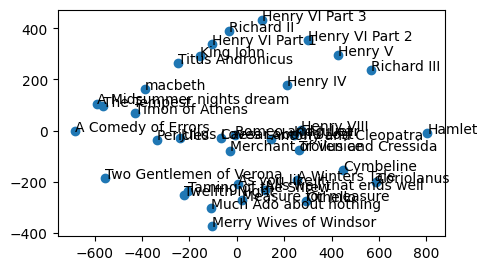

In [58]:
comp_matrix = np.array(vocab_matrix.T)[range(1, 37), :]
pca = PCA(n_components=2)
result = pca.fit_transform(comp_matrix)

figure(figsize=(5, 3), dpi=100)
pyplot.scatter(result[:, 0], result[:, 1])
for i, play in enumerate(plays):
    pyplot.annotate(play, xy=(result[i, 0], result[i, 1]))
pyplot.show()

**Conclusion:**

    Plays "A Midsummer nights dream" and "The Tempest" are most similar since they are closed to each other. Also, plays "Taming of the Shrew" and "Twelfth Night" are also quiet similar.

**Task 12**

In [48]:
print(genres.iloc[np.where(genres['play'] == "A Midsummer nights dream")[0][0]])

play     A Midsummer nights dream
genre                    comedies
Name: 1, dtype: object


In [49]:
print(genres.iloc[np.where(genres['play'] == "The Tempest")[0][0]])

play     The Tempest
genre       comedies
Name: 12, dtype: object


In [50]:
print(genres.iloc[np.where(genres['play'] == "Taming of the Shrew")[0][0]])

play     Taming of the Shrew
genre               comedies
Name: 11, dtype: object


In [51]:
print(genres.iloc[np.where(genres['play'] == "Twelfth Night")[0][0]])

play     Twelfth Night
genre         comedies
Name: 13, dtype: object


**Conclusion:**
    
    Plays "A Midsummer nights dream" and "The Tempest" are most similar and plays "Taming of the Shrew" and "Twelfth Night" are also quiet similar to each other. They match the grouping of Shakespeare’s plays into comedies.

**Task 13**

In [59]:
plays = list(np.unique(will_play[0]))
will_play_array = np.array(will_play)
nlp = spacy.load("en_core_web_sm")
lemmatizer = nlp.get_pipe("lemmatizer")
vocab_matrix = pd.DataFrame(vocab, columns = ['vocab'])
plays_content = []
for play in plays:
    index = np.where(will_play[0] == play)[0]
    test_list = list(will_play_array[index, 1])
    full_content = []
    for sent in test_list:
        doc = nlp(sent)
        for token in doc:
            full_content.append(token.lemma_)
    txt = ' '.join(full_content)
    plays_content.append(txt)
    # print('play: "', play, '" is done')

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(plays_content).toarray()
pca = PCA(n_components=2)
result = pca.fit_transform(X)

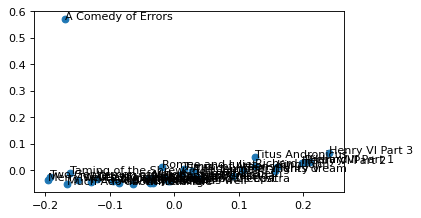

In [61]:
figure(figsize=(5, 3), dpi=80)
pyplot.scatter(result[:, 0], result[:, 1])
for i, play in enumerate(plays):
    pyplot.annotate(play, xy=(result[i, 0], result[i, 1]))
pyplot.show()

**Task 14 & 15:**

14. Create a word-word matrix where each row (and each column) represents a word in the vocabulary (vocab.txt).
Each entry in this matrix represents the number of times a particular word (defined by the row) co-occurs with another
word (defined by the column) in a sentence (i.e., line in will play text.csv). Using the row word vectors, create a representation
of a play as the average of all the word vectors in the play. Use these vector representations of plays to compute
average pairwise cosine-similarity between plays that are comedies (do not include self-similarities). You can use the
grouping of plays in here.

15. Using vector representations of plays computed in task 14, compute average pairwise cosine-similarity between
plays that are histories, and between plays that are tragedies (do not include self-similarities).

Hint: 
[How to calculate a word-word-co-occurence-matrix with sklearn](https://stackoverflow.com/questions/35562789/how-do-i-calculate-a-word-word-co-occurrence-matrix-with-sklearn).

**Task 14**

In [62]:
# Create a word-word matrix
plays = list(np.unique(will_play[0]))
will_play_array = np.array(will_play)
nlp = spacy.load("en_core_web_sm")
lemmatizer = nlp.get_pipe("lemmatizer")
vocab_matrix = pd.DataFrame(vocab, columns = ['vocab'])
plays_dict = {}
for play in plays:
    index = np.where(will_play[0] == play)[0]
    test_list = list(will_play_array[index, 1])
    full_content = []
    for sent in test_list:
        doc = nlp(sent)
        for token in doc:
            full_content.append(token.lemma_)
    plays_dict[play] = full_content
    # print('play: "', play, '" is done')

In [63]:
count_model = CountVectorizer(ngram_range=(1,1)) # default unigram model
X = count_model.fit_transform(plays_content)
Xc = (X.T * X) # this is co-occurrence matrix in sparse csr format
Xc.setdiag(0) # sometimes you want to fill same word cooccurence to 0
print(Xc.todense()) # print out matrix in dense format
features = count_model.get_feature_names_out()
word_word_matrix = Xc.toarray()

[[ 0  0  0 ...  0  0  0]
 [ 0  0  2 ...  6  4  0]
 [ 0  2  0 ... 12  8  0]
 ...
 [ 0  6 12 ...  0 27  0]
 [ 0  4  8 ... 27  0  0]
 [ 0  0  0 ...  0  0  0]]


In [64]:
word_rep_dict = {}
for i in range(features.shape[0]): 
    word_rep_dict[features[i]] = word_word_matrix[i, :]
plays_rep_dict = {}
for play in list(plays_dict.keys()):
    play_array = []
    for word in plays_dict[play]:
        if word in list(word_rep_dict.keys()):
            newrow = word_rep_dict[word]
            play_array.append(newrow)
    plays_rep_dict[play] = np.array(play_array).mean(axis=0).reshape(1, features.shape[0])
    # print('"', play, '" is done')

In [65]:
genre_type = np.unique(genres['genre'])
genre_type[2]

' tragedies'

In [74]:
comedies_list = list(genres[genres['genre'] == ' comedies']['play'])
histories_list = list(genres[genres['genre'] == ' histories']['play'])
tragedies_list = list(genres[genres['genre'] == ' tragedies']['play'])

def similarity_matrix(type_list):
    similarity_matrix = np.zeros((len(type_list), len(type_list)))
    for i in range(len(type_list)): 
        for j in range(len(type_list)):
            similarity_matrix[i, j] = cosine_similarity(plays_rep_dict[type_list[i]], plays_rep_dict[type_list[j]])[0][0]
    return(similarity_matrix)
def remove_diag(x):
    x_no_diag = np.ndarray.flatten(x)
    x_no_diag = np.delete(x_no_diag, range(0, len(x_no_diag), len(x) + 1), 0)
    x_no_diag = x_no_diag.reshape(len(x), len(x) - 1)
    return x_no_diag

comedies_similarity_matrix = remove_diag(similarity_matrix(comedies_list))
histories_similarity_matrix = remove_diag(similarity_matrix(histories_list))
tragedies_similarity_matrix = remove_diag(similarity_matrix(tragedies_list))

In [76]:
print("play as word average comedies", comedies_similarity_matrix.mean(axis = 0).mean(axis = 0))

play as word average comedies 0.9998215509516198


**Task 15**

In [77]:
print("play as word average histories", histories_similarity_matrix.mean(axis = 0).mean(axis = 0))
print("play as word average tragedies", tragedies_similarity_matrix.mean(axis = 0).mean(axis = 0))

play as word average histories 0.9999220244460574
play as word average tragedies 0.9998302558497175


**Task 16:**

16. Use gensim to learn 100-dimensional word2vec representation of the words in the play (you can use default
parameters but with min count=1 so you can learn vector representations of all the words in your data i.e., no need to
use vocab.txt in this question). Use the learned word2vec representation to construct vector representations of plays as
the average of all the word vectors in the play. Visualize these representations to see which plays are most similar to each other.

**Hint:** from now, since the inputs are no longer sparse, use the PCA function instead of the 'truncatedSVD' one.

In [145]:
will_play = pd.read_csv(WILL_PLAY, header = None)

In [146]:
will_play_clear = preprocess(will_play[1])

the number of tweets to be processed is:  111396


In [147]:
sentence_data = []
for content in will_play_clear:
    for sentence in content: 
        sentence_data.append(sentence)

In [148]:
# learn 100-dimensional word2vec representation
model = Word2Vec(sentences = sentence_data, vector_size = 100, min_count = 1)
model.save("word2vec.model")

word_vectors = model.wv
word_vectors.save("word2vec.wordvectors")

# Load back with memory-mapping = read-only, shared across processes.
wv = KeyedVectors.load("word2vec.wordvectors", mmap='r')
wv_vectors = wv.vectors
wv_words = wv.index_to_key
wv_dict = {}
for i in range(len(wv_words)):
    wv_dict[wv_words[i]] = wv_vectors[i, :]

In [152]:
df = pd.DataFrame(wv_dict).transpose()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
",",0.244691,0.724153,0.827536,-0.087344,0.076355,-0.353552,0.294183,0.149920,-0.949216,-0.094829,...,0.896973,0.420746,-0.227392,0.654730,0.959705,0.822194,-1.008799,-0.058809,0.026532,-0.270906
.,-0.954022,0.754136,0.821995,0.397328,0.563879,0.263671,1.371737,0.368393,-0.982940,-0.468027,...,1.777776,0.883048,-0.585212,0.416008,1.241239,1.136930,-0.564010,-0.645326,-0.221068,-0.933994
I,-0.601336,-0.197622,-0.275719,-0.898566,0.163731,-0.367768,-1.843865,-1.159096,-0.202822,-0.581218,...,2.489491,1.553566,0.347286,0.026742,2.133198,1.432150,-0.177363,-0.446688,-0.313949,-1.269154
be,-0.704003,1.021472,-0.024191,-0.135024,0.339463,-0.338043,0.227614,0.947342,0.386925,-0.720324,...,-0.082850,1.062141,-0.074048,0.481772,0.548814,0.921268,-0.632510,-0.868809,0.861392,-1.947838
the,-0.702189,0.983469,-1.083607,-0.630975,0.484883,0.463322,1.285344,1.290810,-0.086190,0.224616,...,2.027369,0.534409,0.705668,-0.957851,-0.011345,0.631492,1.018378,-0.236930,-0.565543,-0.661352


In [150]:
plays = list(np.unique(will_play[0]))
plays_rep_dict = {}
for play in plays: 
    play_list = []
    for word in play: 
        if word in wv_words:
            play_list.append(wv_dict[word])
    plays_rep_dict[play] = np.array(play_list).mean(axis=0)

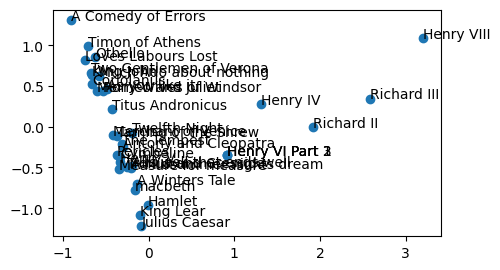

In [151]:
X = []
for play in plays:
    X.append(plays_rep_dict[play])
X = np.array(X)
pca = PCA(n_components=2)
result = pca.fit_transform(X)

figure(figsize=(5, 3), dpi=100)
pyplot.scatter(result[:, 0], result[:, 1])
for i, play in enumerate(plays):
    pyplot.annotate(play, xy=(result[i, 0], result[i, 1]))
pyplot.show()

**Task 17:**

17. Construct the vector representation of each character as the average
of all lines’ representations that the character spoke (with the trained gensim trained representation). Visualize the characters using PCA.

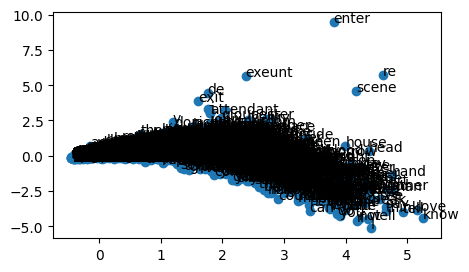

In [160]:
X = []
for word in wv_words:
    X.append(wv_dict[word])
X = np.array(X)
pca = PCA(n_components=2)
result = pca.fit_transform(X)

figure(figsize=(5, 3), dpi=100)
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(wv_words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

**Task 18:**

18. Can you find plays that are central i.e., closest to centroid to each genre? You could do so by visualizing the play representation with PCA.

In [161]:
X_comedies = []
for play in comedies_list:
    X_comedies.append(plays_rep_dict[play])
X_comedies = np.array(X_comedies)
pca = PCA(n_components=2)
result_comedies = pca.fit_transform(X_comedies)

X_histories = []
for play in histories_list:
    X_histories.append(plays_rep_dict[play])
X_histories = np.array(X_histories)
pca = PCA(n_components=2)
result_histories = pca.fit_transform(X_histories)

X_tragedies = []
for play in tragedies_list:
    X_tragedies.append(plays_rep_dict[play])
X_tragedies = np.array(X_tragedies)
pca = PCA(n_components=2)
result_tragedies = pca.fit_transform(X_tragedies)

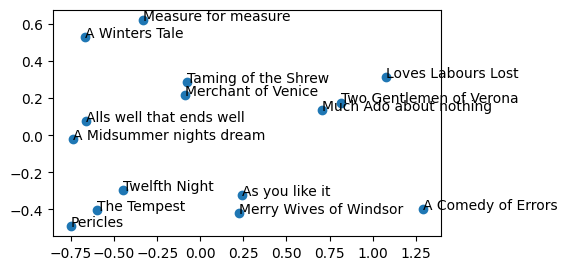

In [162]:
figure(figsize=(5, 3), dpi=100)
pyplot.scatter(result_comedies[:, 0], result_comedies[:, 1])
for i, play in enumerate(comedies_list):
    pyplot.annotate(play, xy=(result_comedies[i, 0], result_comedies[i, 1]))
pyplot.show()

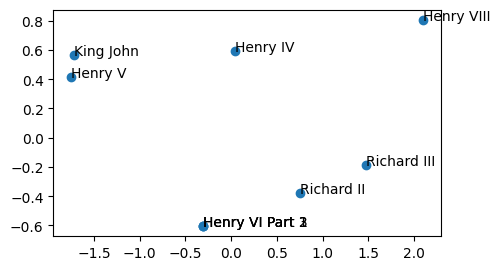

In [163]:
figure(figsize=(5, 3), dpi=100)
pyplot.scatter(result_histories[:, 0], result_histories[:, 1])
for i, play in enumerate(histories_list):
    pyplot.annotate(play, xy=(result_histories[i, 0], result_histories[i, 1]))
pyplot.show()

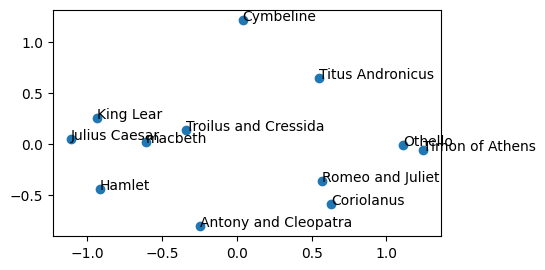

In [164]:
figure(figsize=(5, 3), dpi=100)
pyplot.scatter(result_tragedies[:, 0], result_tragedies[:, 1])
for i, play in enumerate(tragedies_list):
    pyplot.annotate(play, xy=(result_tragedies[i, 0], result_tragedies[i, 1]))
pyplot.show()

**Conclusion:**

    For comedies and histories plays, it's hard to say which play is closet to the centroid to the genre. But    for tragedies, play 'Troilus and Cressida' seems to be the centroid of the genre.